## Hyper paranoid data quality validation

Hey, do you know what's a bummer in an image?  NANs.  That'll become more relevant after we generate the augmented images.

Also I want to check the image sizes.

In [1]:
import pandas as pd
import numpy as np
from typing import Tuple

import cv2
import tifffile as tif
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/stratified-dataset.csv', index_col=0)

df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 611
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   filename         612 non-null    object
 1   frame_number     612 non-null    int64 
 2   sequence         612 non-null    int64 
 3   img_filepath     612 non-null    object
 4   gt_filepath      612 non-null    object
 5   crossfold_group  612 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 33.5+ KB


,filename,frame_number,sequence,img_filepath,gt_filepath,crossfold_group
0,1.tif,1,1,D:/Downloads/Datasets/archive/CVC-ClinicDB/Ori...,D:/Downloads/Datasets/archive/CVC-ClinicDB/Gro...,5
1,2.tif,2,1,D:/Downloads/Datasets/archive/CVC-ClinicDB/Ori...,D:/Downloads/Datasets/archive/CVC-ClinicDB/Gro...,1
2,3.tif,3,1,D:/Downloads/Datasets/archive/CVC-ClinicDB/Ori...,D:/Downloads/Datasets/archive/CVC-ClinicDB/Gro...,2


In [3]:
# Depending on how long this sort of thing takes and
# how frequently I do it, I'd consider using joblib to 
# make this parallel, but my laptop doesn't seem to care.

def get_shape(pth: str) -> Tuple:
    im = tif.imread(pth)
    return im.shape

def get_nans(pth: str) -> Tuple:
    im = tif.imread(pth)
    return np.isnan(im).any()

im_shapes = [get_shape(x) for x in df['img_filepath']]
im_shapes = set(im_shapes)
print(im_shapes)

nans = [get_nans(x) for x in df['img_filepath']]
nans = set(nans)
print(nans)

{(288, 384, 3)}
{False}


In [4]:
gt_shapes = [get_shape(x) for x in df['gt_filepath']]
gt_shapes = set(gt_shapes)
print(gt_shapes)

nans = [get_nans(x) for x in df['gt_filepath']]
nans = set(nans)
print(nans)

{(288, 384)}
{False}


No nans!  Yay!

So we're not working with squares, which we knew. But now we  k n o w.  Ugh, should we keep the black part or not... I prefer image realestate to be taken up by meaningful data...

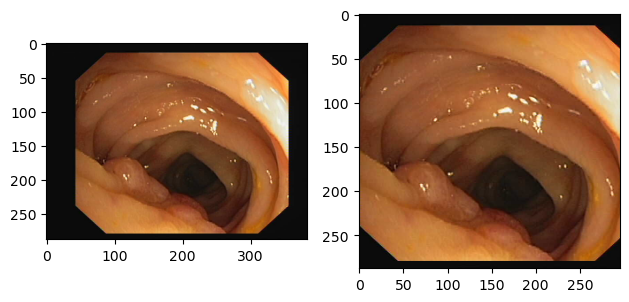

(288, 384, 3) (288, 296, 3)


In [10]:
# Test execution on their sample code
i = 0

rem = 44

pth = df.at[i, 'img_filepath']
im = tif.imread(pth)
crop = im[:,rem:-rem]

plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(crop)
plt.tight_layout()
plt.show()

print(im.shape, crop.shape)

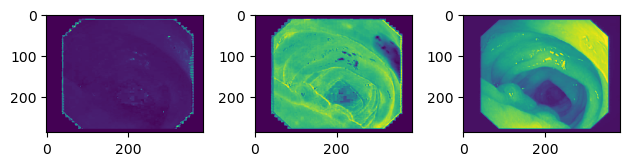

In [14]:
hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

h,s,v = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]

plt.subplot(1,3,1)
plt.imshow(h)
plt.subplot(1,3,2)
plt.imshow(s)
plt.subplot(1,3,3)
plt.imshow(v)
plt.tight_layout()
plt.show()

In [20]:
help(cv2.threshold)

Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst]) -> retval, dst
    .   @brief Applies a fixed-level threshold to each array element.
    .   
    .   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
    .   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
    .   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
    .   values. There are several types of thresholding supported by the function. They are determined by
    .   type parameter.
    .   
    .   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
    .   above values. In these cases, the function determines the optimal threshold value using the Otsu's
    .   or Triangle algorithm and uses it instead of the specified thresh.
    .   
    .   @note Currently, the Otsu's and Triangle methods a

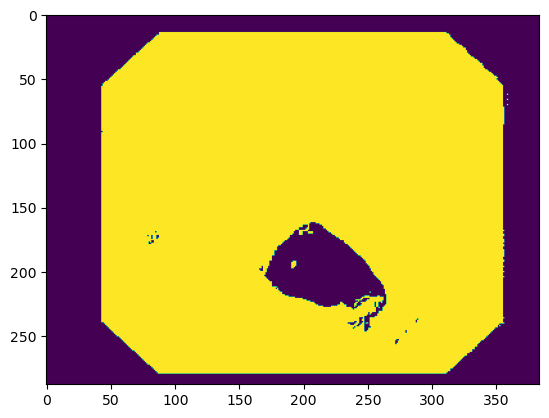

In [29]:
_, thresh = cv2.threshold(v, 50, 255, cv2.THRESH_BINARY)

plt.imshow(thresh)
plt.show()